In [1]:
import dgl
import numpy as np
import torch

import matplotlib.pyplot as plt
import networkx as nx
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

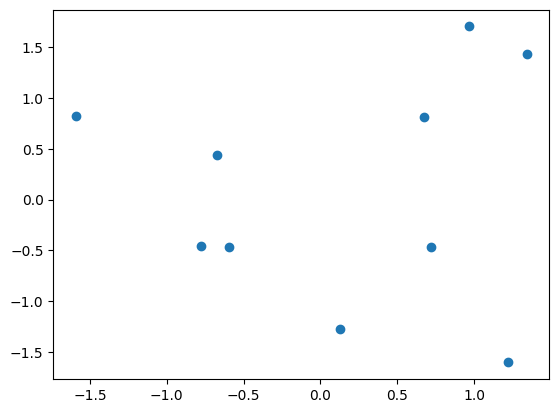

In [2]:
plt.figure()
plt.scatter(np.random.randn(10, 1), np.random.randn(10, 1))

In [3]:
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]))

In [4]:
nxg = dgl.to_networkx(g)

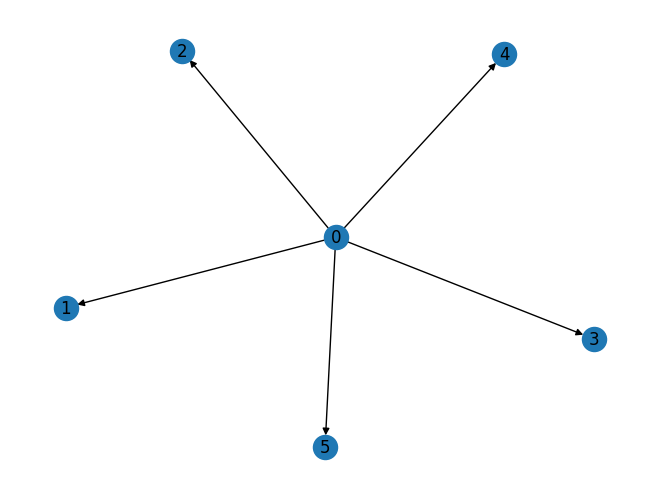

In [5]:
# plt.figure(figsize=(2,2))
nx.draw(nxg, with_labels=True)

In [9]:
g.ndata["x"] = torch.randn((g.num_nodes(), 4))
g.edata["a"] = torch.randn((g.num_edges(), 5))
g.ndata["y"] = torch.randn(g.num_nodes(), 2, 2)
print(g.ndata["x"])

tensor([[ 0.3255, -2.0126, -0.4076, -0.4077],
        [-1.8767, -0.7343,  1.1684,  1.0361],
        [-0.3712,  1.2328, -0.8388, -0.2242],
        [-0.0568, -0.3999,  1.2575,  0.5989],
        [ 0.5128,  0.5154,  1.6091, -0.9769],
        [ 0.7061,  0.6220, -1.8342, -0.5122]])


tensor([[ 0.3255, -2.0126, -0.4076, -0.4077],
        [-1.8767, -0.7343,  1.1684,  1.0361],
        [-0.3712,  1.2328, -0.8388, -0.2242]])


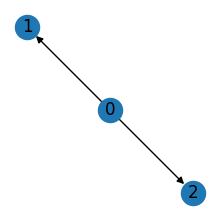

In [10]:
sg1 = g.subgraph([0, 1, 2])
print(sg1.ndata["x"])
plt.figure(figsize=(2, 2))
nx.draw(dgl.to_networkx(sg1), with_labels=True)

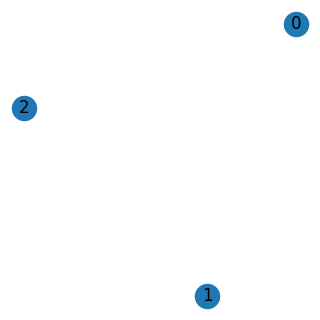

In [11]:
sg2 = g.subgraph([3, 1, 2])

plt.figure(figsize=(3, 3))
nx.draw(dgl.to_networkx(sg2), with_labels=True)

In [12]:
print(g.edata["a"])

tensor([[-1.1013, -1.2418,  2.0957, -0.1989, -1.8353],
        [ 0.2475,  1.2393,  0.9077, -1.0777,  0.6723],
        [-0.2187, -0.2213,  1.3501, -0.0609, -0.0985],
        [-1.8136,  0.6689, -1.4172,  0.8063, -0.8830],
        [-0.0802,  0.3441,  0.1033, -1.1616,  0.2384]])


In [13]:
sg3 = g.edge_subgraph([3, 1, 2])
print(sg3.edata["a"])

tensor([[-1.8136,  0.6689, -1.4172,  0.8063, -0.8830],
        [ 0.2475,  1.2393,  0.9077, -1.0777,  0.6723],
        [-0.2187, -0.2213,  1.3501, -0.0609, -0.0985]])


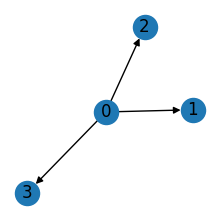

In [14]:
plt.figure(figsize=(2, 2))
nx.draw(dgl.to_networkx(sg3), with_labels=True)

In [15]:
bg = dgl.add_reverse_edges(g)

In [16]:
bg

Graph(num_nodes=6, num_edges=10,
      ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(2, 2), dtype=torch.float32)}
      edata_schemes={})

In [17]:
bg.edges()

(tensor([0, 0, 0, 0, 0, 1, 2, 3, 4, 5]),
 tensor([1, 2, 3, 4, 5, 0, 0, 0, 0, 0]))

In [18]:
bg.nodes()

tensor([0, 1, 2, 3, 4, 5])

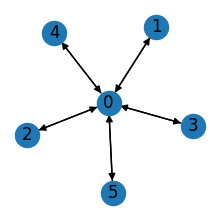

In [19]:
plt.figure(figsize=(2, 2))
nx.draw(dgl.to_networkx(bg), with_labels=True)

In [20]:
dgl.save_graphs("subgraphs.dgl", [sg1, sg2, sg3])

In [21]:
sgs = dgl.load_graphs("subgraphs.dgl")

In [22]:
for i, sg in enumerate(sgs[0]):
    print(i, sg)

0 Graph(num_nodes=3, num_edges=2,
      ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(2, 2), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'a': Scheme(shape=(5,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})
1 Graph(num_nodes=3, num_edges=0,
      ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(2, 2), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'a': Scheme(shape=(5,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})
2 Graph(num_nodes=4, num_edges=3,
      ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(2, 2), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'a': Scheme(shape=(5,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})
